In [9]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import random
import glob
import os
import pandas as pd


plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['figure.dpi'] = 500

from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [13]:
def load_files(files, fast_loading):
    print(f"start loading data, number of files {len(files[0])}", flush=True)
    if len(files) == 1:
        files = files[0]
        # check how data is stored
        with open(files[0]) as f:
            if '#X' == f.readline().split('\t')[0]:
                header = 0
            else:
                header = None

        all_images = []
        all_wavenumbers = []
        for i, file in enumerate(files):
            print(f"opening file {i+1} of {len(files)}: {file}", flush=True)
            df = pd.read_csv(file, delimiter='\t', skipinitialspace=True, header=header, skiprows=[], dtype=np.float32)
            data = df.to_numpy()

            if header is None:
                wavenumbers = data[0,2:]
                data = data[1:]
            else:
                wavenumbers = sorted(list(np.unique(data[:,2])))

            X = list(sorted(np.unique(data[:,0])))
            Y = list(sorted(np.unique(data[:,1])))

            if fast_loading:
                if header is None:
                    data = data[:,2:]
                    img = data.reshape(len(X), len(Y), len(wavenumbers))
                else:
                    data = data[:,3]
                    data = data.reshape(len(Y), len(X), len(wavenumbers))
                    data = np.rollaxis(data, 1, 0)
                    img = data[:,:,::-1]
            else:
                img = np.empty((len(X), len(Y), len(wavenumbers)), dtype=np.float32)
                if header is None:
                    for d in data:
                        i = X.index(d[0])
                        j = Y.index(d[1])
                        img[i,j,:] = d[2:]
                else:
                    for d in data:
                        i = X.index(d[0])
                        j = Y.index(d[1])
                        w = wavenumbers.index(d[2])
                        img[i,j,w] = d[3]

                    wavenumbers = np.array(wavenumbers)

            print(f"loaded  file {i+1} of {len(files)}: {file}", flush=True)
            all_images.append(img)
            all_wavenumbers.append(wavenumbers)
    else:
        files, wave_files = files[0], files[1]
        if len(wave_files) == 1:
            all_wavenumbers = np.load(wave_files[0])
            all_images = []
            for file in files:
                all_images.append(np.load(file))
        else:
            all_images = []
            all_wavenumbers = []
            for file in files:
                all_images.append(np.load(file))
                all_wavenumbers.append(np.load(file.replace('.npy','_Wavenumbers.npy')))
        print(f"data loaded", flush=True)
    return np.array(all_images), np.array(all_wavenumbers), files


In [16]:
file_location = "../data/raman_extra_data/raman 2022-12-01 16-48-12.105179/"
filename = "ML-MoS2-532-LP10-2-3-50X (1)_raman.txt"

data, wavenumbers, _ = load_files(([file_location+filename],), True)

start loading data, number of files 1
opening file 1 of 1: ../data/raman_extra_data/raman 2022-12-01 16-48-12.105179/ML-MoS2-532-LP10-2-3-50X (1)_raman.txt
loaded  file 1 of 1: ../data/raman_extra_data/raman 2022-12-01 16-48-12.105179/ML-MoS2-532-LP10-2-3-50X (1)_raman.txt


from image 0 show coordinates (10, 28)


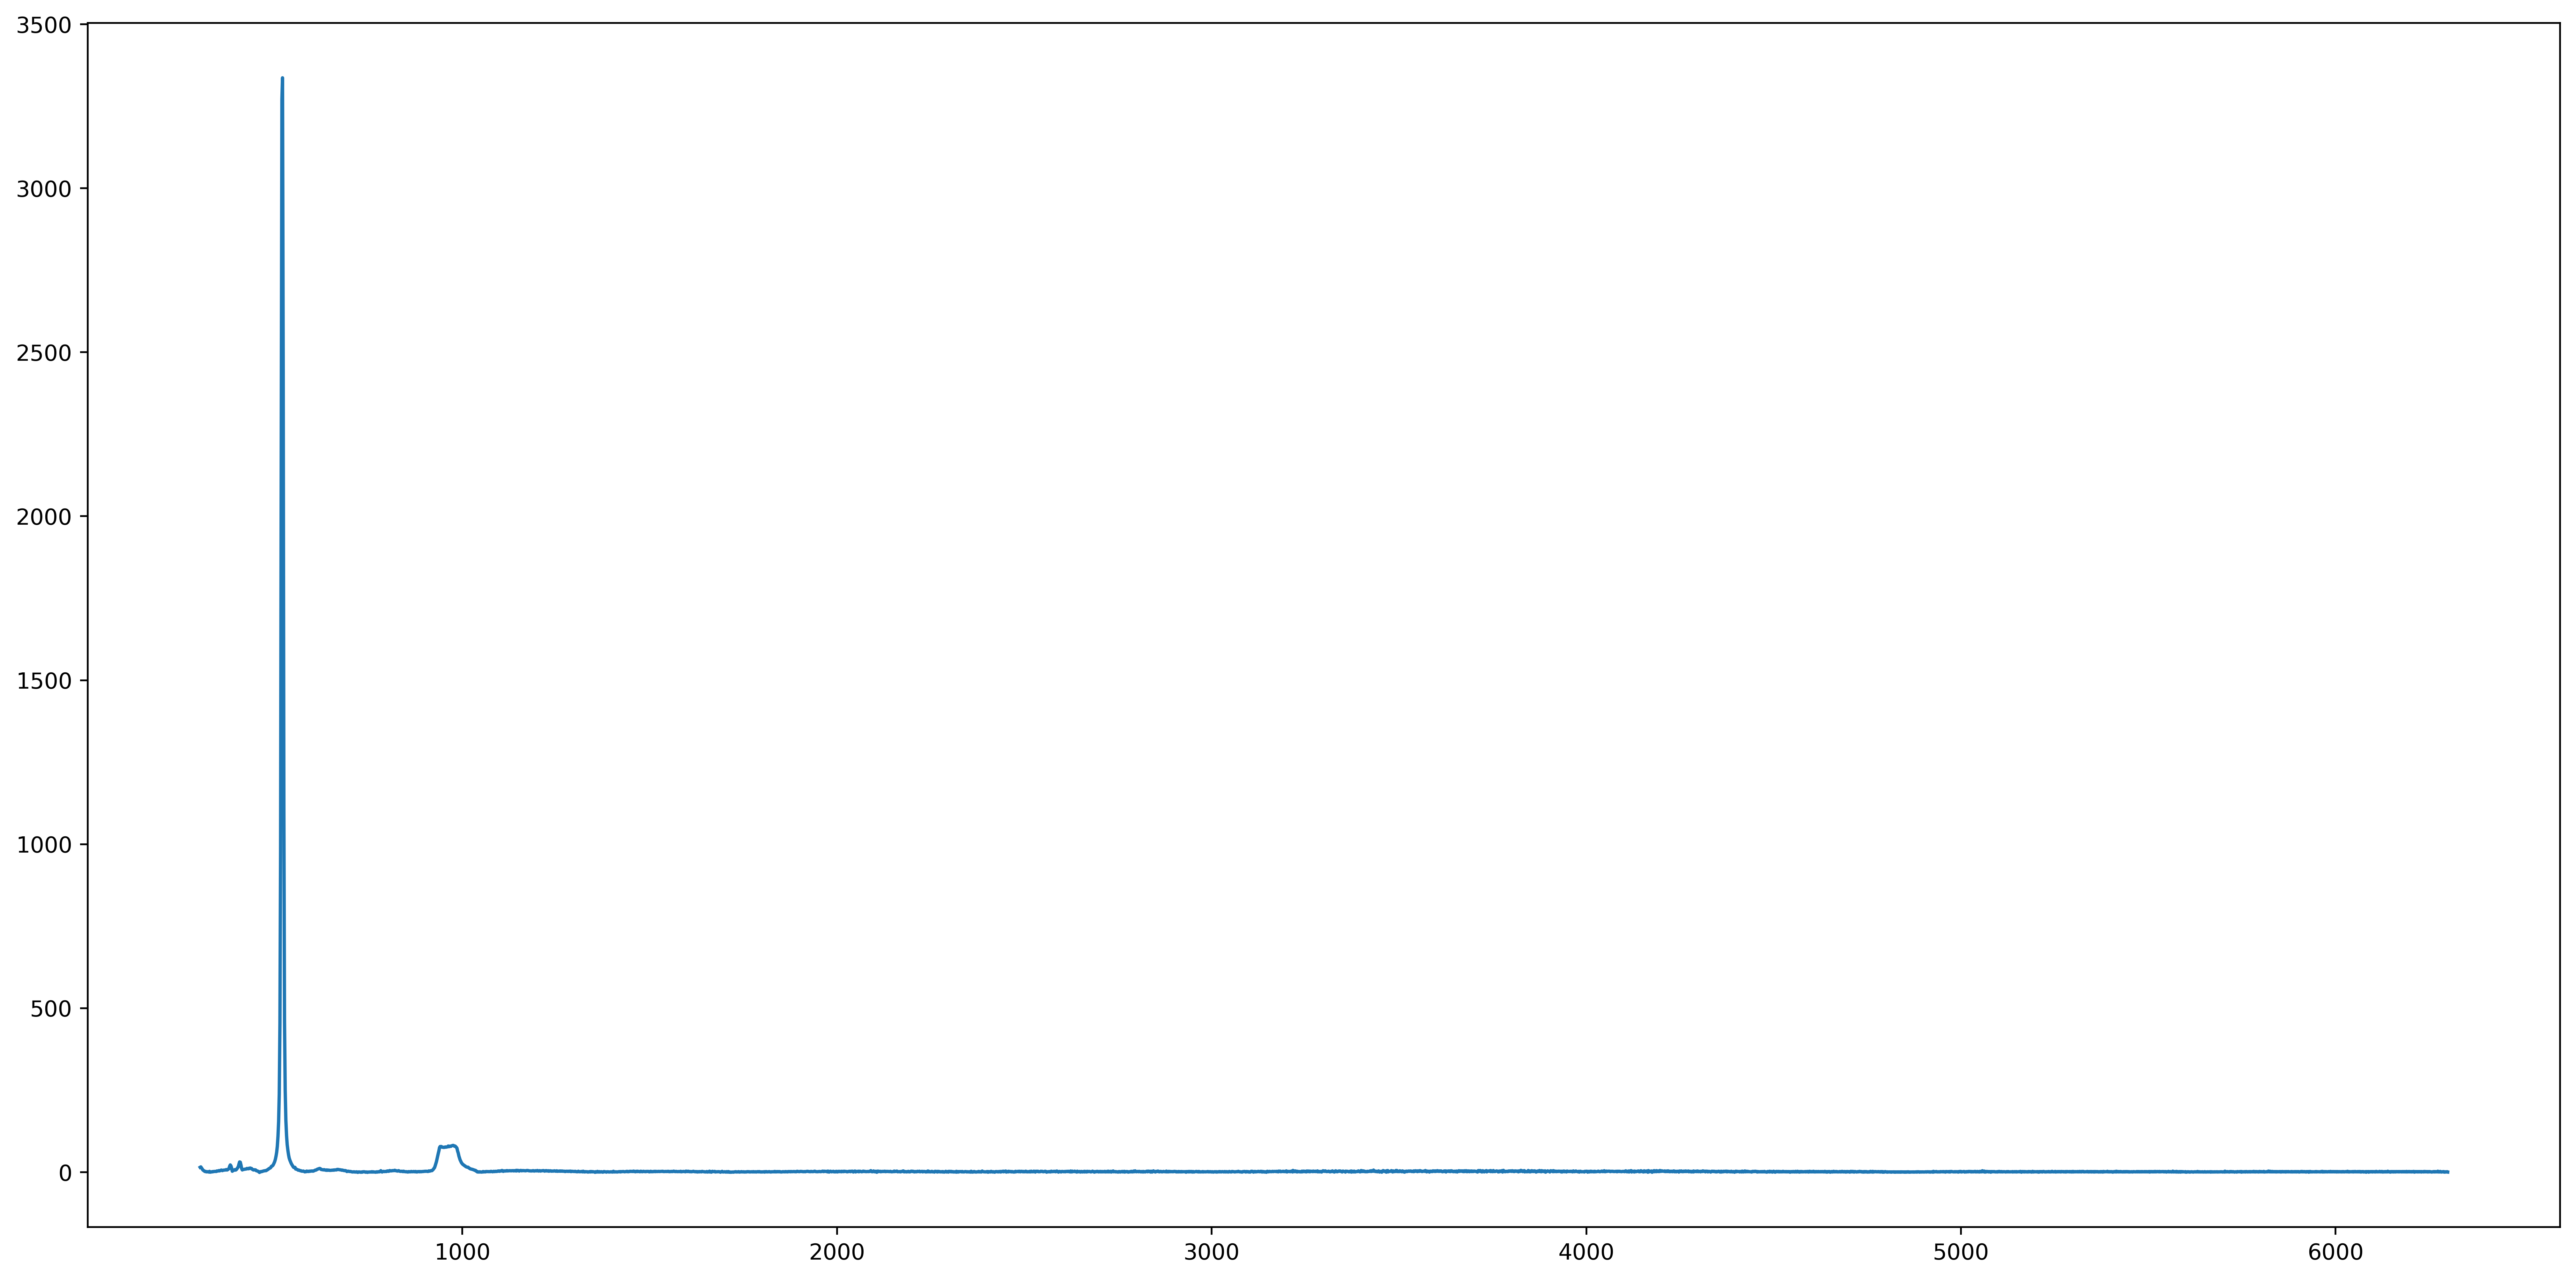

In [27]:
images_n = 0
random_coor = lambda x,y: (np.random.randint(x), np.random.randint(y))
x,y = random_coor(*data.shape[1:3])
print(f"from image {images_n} show coordinates {x,y}")
plt.plot(wavenumbers[images_n], data[images_n][x][y])
plt.show()